In [55]:
import scipy as sc
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import numpy as np
import math

img = Image.open('test_image.png')

arr_img = asarray(img)



In [56]:
def bl_resize(original_img, new_h, new_w):
    #get dimensions of original image
    old_h, old_w, c = original_img.shape
    #create an array of the desired shape. 
    #We will fill-in the values later.
    resized = np.zeros((new_h, new_w, c))
    #Calculate horizontal and vertical scaling factor
    w_scale_factor = old_w / new_w if new_h != 0 else 0
    h_scale_factor = old_h / new_h if new_w != 0 else 0
    for i in range(new_h):
        for j in range(new_w):
            #map the coordinates back to the original image
            x = i * h_scale_factor
            y = j * w_scale_factor
            #calculate the coordinate values for 4 surrounding pixels.
            x_floor = math.floor(x)
            x_ceil = min(old_h - 1, math.ceil(x))
            y_floor = math.floor(y)
            y_ceil = min(old_w - 1, math.ceil(y))

            if (x_ceil == x_floor) and (y_ceil == y_floor):
                q = original_img[int(x), int(y), :]
            elif x_ceil == x_floor:
                q1 = original_img[int(x), int(y_floor), :]
                q2 = original_img[int(x), int(y_ceil), :]
                q = q1 * (y_ceil - y) + q2 * (y - y_floor)
            elif y_ceil == y_floor:
                q1 = original_img[int(x_floor), int(y), :]
                q2 = original_img[int(x_ceil), int(y), :]
                q = (q1 * (x_ceil - x)) + (q2 * (x - x_floor))
            else:
                v1 = original_img[x_floor, y_floor, :]
                v2 = original_img[x_ceil, y_floor, :]
                v3 = original_img[x_floor, y_ceil, :]
                v4 = original_img[x_ceil, y_ceil, :]

                q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
                q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
                q = q1 * (y_ceil - y) + q2 * (y - y_floor)

            resized[i, j, :] = q
    return resized.astype(np.uint8)


In [57]:
def show_image(data):
    plt.imshow(data)
    plt.show()

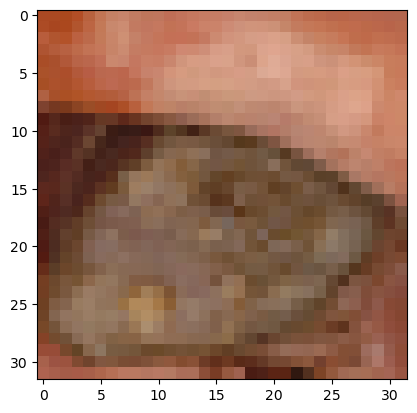

[[ 35  34  29  38  62  84 101 107]
 [ 98  91  93  86  91  95  99 101]
 [106 111 108 106 102  99  86  78]
 [ 75  74  72  76  78  77  78  78]]


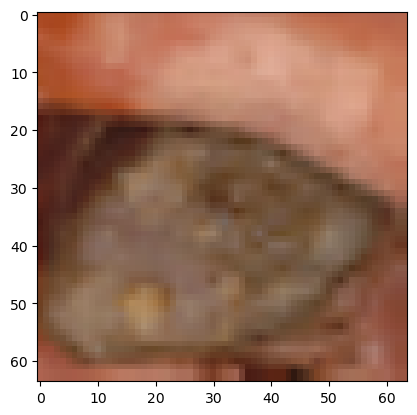

[[ 35  34  34  31  29  33  38  50]
 [ 62  73  84  92 101 104 107 102]
 [ 98  94  91  92  93  89  86  88]
 [ 91  93  95  97  99 100 101 103]
 [106 108 111 109 108 107 106 104]
 [102 100  99  92  86  82  78  76]
 [ 75  74  74  73  72  74  76  77]
 [ 78  77  77  77  78  78  78  78]]


In [103]:


show_image(arr_img)
print(np.matrix(arr_img[:, :, 2][0:1][0:3].reshape(4,8)))

new_img_arr = bl_resize(arr_img, 64, 64)
show_image(new_img_arr)
print(np.matrix(new_img_arr[:, :, 2][0:1][0:3].reshape(8,8)))